In [7]:
import pandas as pd
import numpy as np

In [6]:

with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("/students/2023-2024/Thema07/biogas/log/boven2_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_boven = pd.read_csv("../newtest.log", sep=("\t"), )

FileNotFoundError: [Errno 2] No such file or directory: '/students/2023-2024/Thema07/biogas/log/boven2_all_report.log'

In [ ]:


with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("/students/2023-2024/Thema07/biogas/log/midden3_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_midden = pd.read_csv("../newtest.log", sep=("\t"), )

In [ ]:


with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("/students/2023-2024/Thema07/biogas/log/onder1_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_onder = pd.read_csv("../newtest.log", sep=("\t"), )

In [ ]:
with open("../newtest.log", 'w') as writefile:
    column_names = "perc_frag\tcov_frag\tass_frag\trank_code\ttaxonomic_ID\ttaxonomic_name\n"
    writefile.write(column_names)
    with open("/students/2023-2024/Thema07/biogas/log/pacques2_all_report.log", "r") as file:
        for line in file:
            line = line.replace(" ","")
            writefile.write(line)

df_pacques = pd.read_csv("../newtest.log", sep=("\t"), )

1) Percentage of fragments covered by the clade rooted at this taxon
2) Number of fragments covered by the clade rooted at this taxon
3) Number of fragments assigned directly to this taxon

(U)nclassified, (R)oot, (D)omain, (K)ingdom, (P)hylum, (C)lass,
(O)rder, (F)amily, (G)enus, (S)pecies

In [ ]:
filter homosapiens der uit

In [ ]:
def del_human(df):
    euka_index = df[df["taxonomic_name"] == "Eukaryota"].index.tolist()
    homo_index = df[df["taxonomic_name"] == "Homosapiens"].index.tolist()

    list_to_remove = list(range(euka_index[0], homo_index[0] +1))
    df = df.drop(list_to_remove)
    # thanks to aimee <3
    return df

In [ ]:
df_midden = del_human(df_midden)
df_pacques = del_human(df_pacques)
df_boven = del_human(df_boven)
df_onder = del_human(df_onder)

In [ ]:
df_onder.loc[df_onder["rank_code"].isnull()]

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
1,71.43,830940,388,NaN,1,root
3,55.34,643796,86,NaN,2157,Archaea
789,13.81,160633,15388,NaN,2,Bacteria
13700,1.31,15276,0,NaN,2759,Eukaryota
13730,0.11,1240,1,NaN,10239,Viruses
14167,0.00,4,0,NaN,2946196,Polydnaviriformidae
14172,0.00,3,0,NaN,2840056,Naldaviricetes


filter on genus

In [ ]:
def filtah(kraken, filtar):
    values = set(kraken['rank_code'])

    phylo = [value if filtar in str(value) else "" for value in values]
    order_genus = kraken.loc[kraken['rank_code'].isin(phylo)].sort_values(by='perc_frag',  ascending=False)
    return  order_genus

In [ ]:
df_midden_f = filtah(df_midden, "G")
df_boven_f = filtah(df_boven, "G")
df_onder_f = filtah(df_onder, "G")
df_pacques_f = filtah(df_pacques, "G")


In [ ]:
df_pacques_f[:12]

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
14417,17.56,333133,83714,G,2222,Methanothrix
14420,4.36,82787,0,G1,2620051,unclassifiedMethanothrix
14844,4.34,82291,15396,G,2160,Methanobacterium
8,1.84,34858,104,G,561,Escherichia
5993,1.20,22685,4946,G,1883,Streptomyces
15288,0.81,15378,0,G,9605,Homo
767,0.67,12738,3428,G,286,Pseudomonas
14847,0.63,11989,48,G1,2627676,unclassifiedMethanobacterium
5994,0.49,9274,1609,G1,2593676,unclassifiedStreptomyces
11562,0.34,6391,376,G,28231,Geobacter


In [ ]:
df_boven_f[:12]

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
9,31.97,160417,29050,G,145260,Methanothermobacter
10,14.38,72150,8360,G1,2631116,unclassifiedMethanothermobacter
103,11.18,56110,1746,G,2222,Methanothrix
22,7.74,38837,5847,G,2160,Methanobacterium
114,3.99,19998,910,G,2207,Methanosarcina
12051,1.20,6030,0,G,9605,Homo
25,0.87,4350,32,G1,2627676,unclassifiedMethanobacterium
653,0.83,4172,14,G,561,Escherichia
9527,0.80,4021,1,G,1184396,Mesotoga
178,0.79,3963,120,G,2202,Methanospirillum


In [ ]:
df_onder_f[:12]

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
9,32.67,380036,73432,G,145260,Methanothermobacter
102,12.74,148216,5207,G,2222,Methanothrix
10,12.65,147165,17669,G1,2631116,unclassifiedMethanothermobacter
22,7.14,83035,13804,G,2160,Methanobacterium
113,2.03,23623,1011,G,2207,Methanosarcina
13728,1.31,15276,0,G,9605,Homo
10978,0.86,10056,2,G,1184396,Mesotoga
25,0.85,9930,59,G1,2627676,unclassifiedMethanobacterium
794,0.78,9094,15,G,561,Escherichia
10988,0.52,6033,39,G,2335,Thermotoga


In [ ]:
df_midden_f[:12]

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
9,26.43,223596,44117,G,145260,Methanothermobacter
102,13.40,113400,2658,G,2222,Methanothrix
10,10.24,86609,9803,G1,2631116,unclassifiedMethanothermobacter
22,6.73,56930,9263,G,2160,Methanobacterium
113,2.09,17684,783,G,2207,Methanosarcina
13338,1.16,9842,0,G,9605,Homo
745,1.08,9101,20,G,561,Escherichia
25,0.78,6629,44,G1,2627676,unclassifiedMethanobacterium
10615,0.76,6402,34,G,2335,Thermotoga
3799,0.64,5446,172,G,41275,Brevundimonas


import matplotlib as mpl

/tmp/ipykernel_126901/4043174231.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(replace, replace_with, inplace=True)


['Catenibacterium', 'unclassifiedCandidatusNitrotoga', 'unclassifiedSalegentibacter', 'unclassifiedKordiimonas', 'Byrnievirus', 'Paralysiella', 'unclassifiedCoprococcus', 'CandidatusKorarchaeum', 'Cytomegalovirus', 'CandidatusHoaglandella', 'unclassifiedOchrobactrum', 'Congregibacter', 'Keylargovirus', 'unclassifiedNitrosospira', 'Rhodobaca', 'unclassifiedProteus(in:enterobacteria)', 'Leminorella', 'Chlorovirus', 'CandidatusAnnandia', 'Varicellovirus', 'Megrivirus', 'unclassifiedHydrogenobacter', 'Murdochiella', 'unclassifiedHaladaptatus', 'Gleimia', 'unclassifiedSutcliffiella', 'Varibaculum', 'unclassifiedRhodoluna', 'Allocoleopsis', 'Sepunavirus', 'Prodigiosinella', 'CandidatusBandiella', 'Ignavigranum', 'unclassifiedPorphyromonas', 'Ephemeroptericola', 'Pragia', 'Sextaecvirus', 'Stygiolobus', 'Leptospirillumsp.GroupII', 'CandidatusSneabacter', 'Tibrovirus', 'Mergibacter', 'unclassifiedMannheimia', 'Jiaodavirus', 'Fluviispira', 'Snodgrassella', 'Tropheryma', 'unclassifiedActinobacill

/tmp/ipykernel_126901/4043174231.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace(replace, replace_with, inplace=True)


in
['Ranavirus', 'Puppervirus', 'Wphvirus', 'Pettyvirus', 'Webervirus', 'unclassifiedPriestia', 'unclassifiedCycloclasticus', 'Kahucivirus', 'Lyngbya', 'Salmondvirus', 'Avocadovirus', 'Winklervirus', 'Rigallicvirus', 'Squashvirus', 'Otagovirus', 'Freyavirus', 'unclassifiedDolichospermum', 'Julieunavirus', 'Limnothrix', 'Elmenteitavirus', 'unclassifiedSaclayvirus', 'unclassifiedThermoleptolyngbya', 'Bixzunavirus', 'CandidatusAzoamicus', 'unclassifiedAlphabaculovirus', 'Yumkaaxvirus', 'Saintgironsvirus', 'Pulverervirus', 'Fipvunavirus', 'Foveavirus', 'CandidatusNanohalobium', 'Hadassahvirus', 'Schizotequatrovirus', 'Bertelyvirus', 'unclassifiedSedonavirus', 'Vividuovirus', 'Vipetofemvirus', 'unclassifiedKagunavirus', 'Alexandravirus', 'Triduovirus', 'Timshelvirus', 'unclassifiedCronobacter', 'Denitromonas', 'Pankowvirus', 'Dhakavirus', 'unclassifiedSpongiactinospora', 'Delepquintavirus', 'Potyvirus', 'Ripduovirus', 'Hnatkovirus', 'Bifseptvirus', 'Lanavirus', 'Jacevirus', 'unclassifiedCan

/tmp/ipykernel_126901/4043174231.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show();


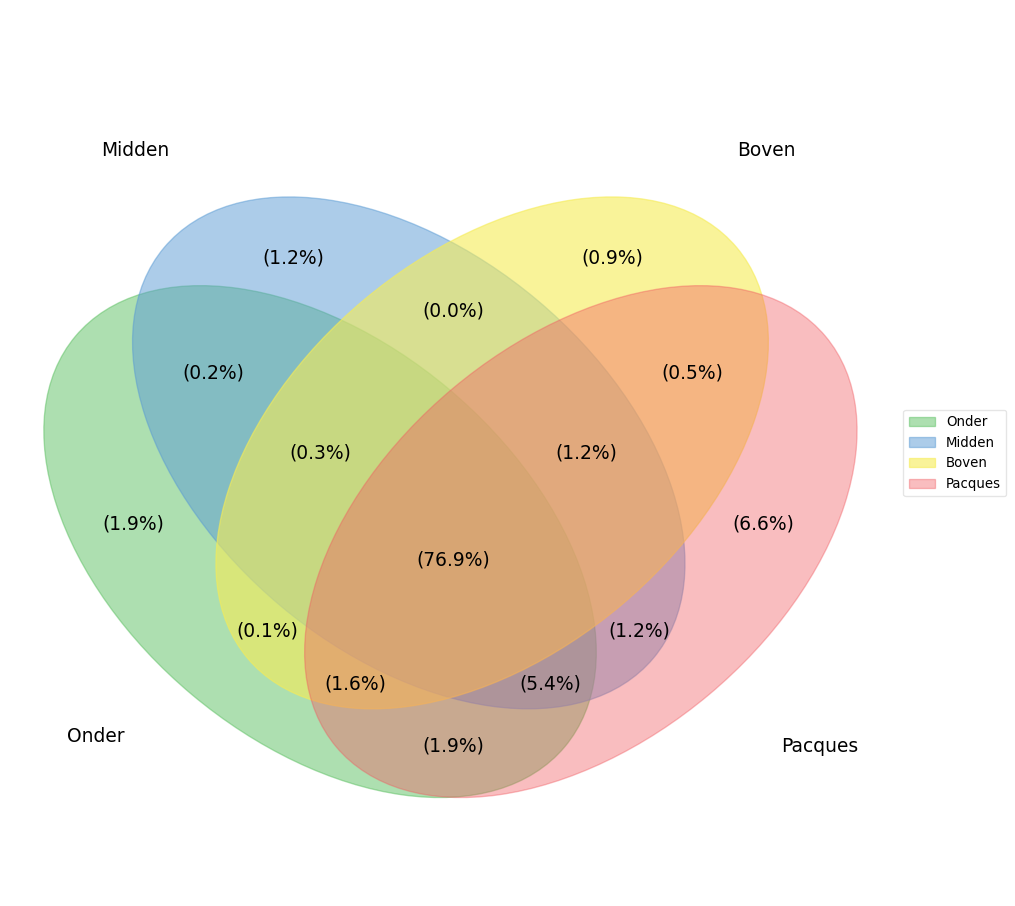

In [ ]:
%matplotlib inline

import venn

def make_num(dataframe, changes):
    if not changes:
        replace_with = 0
        for replace in set(dataframe["taxonomic_name"]):
            replace_with +=1
            changes[replace_with] = replace
            dataframe.replace(replace, replace_with, inplace=True)
    else:
        filtered_list = [string for string in list(set(dataframe["taxonomic_name"])) if string not in list(changes.values())]
        print(filtered_list)
        for replace_with in changes:
            replace = changes[replace_with]
            dataframe.replace(replace, replace_with, inplace=True)
        if filtered_list:
             print("in")
             for replace in filtered_list:
                replace_with +=1
                changes[replace_with] = replace
                dataframe.replace(replace, replace_with, inplace=True)
    list_string = dataframe['taxonomic_name'].tolist()
    return [str(x) for x in list_string], changes
                 

changes = {}
venn_b, changes_b = make_num(df_boven_f, changes)
venn_m, changes_m = make_num(df_midden_f, changes_b)
venn_o, changes_o = make_num(df_onder_f, changes_m)
venn_p, changes_p = make_num(df_pacques_f,changes_o) 

labels = venn.get_labels([venn_o, venn_m, venn_b, venn_p], fill=['percent'])
fig, ax = venn.venn4(labels, names=['Onder', 'Midden', 'Boven', 'Pacques'])
fig.show();


set met alle overeenkomende bacterien

In [ ]:
s_pac = set(venn_p)
s_bov = set(venn_b)
s_mid = set(venn_m)
s_ond = set(venn_o)

intersect = s_ond.intersection(s_bov, s_mid)

def intersect_org(intersect, df):
    """
    makes a df of the top 10 organismen in the intersect between sets
    df: a dataframe from what you want to know the percentages of the org
    """
    l = []
    for num in list(intersect):
        org = changes_o[int(num)]
        l.append(org)
    intersect_df = df.loc[df['taxonomic_name'].isin(l)]
    return intersect_df

df_intersect_b = intersect_org(intersect, df_boven).sort_values(by='perc_frag',  ascending=False)[:10]
df_intersect_o = intersect_org(intersect, df_onder).sort_values(by='perc_frag',  ascending=False)[:10]
df_intersect_m = intersect_org(intersect, df_midden).sort_values(by='perc_frag',  ascending=False)[:10]

In [ ]:
df_intersect_m

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
9,26.43,223596,44117,G,145260,Methanothermobacter
102,13.40,113400,2658,G,2222,Methanothrix
10,10.24,86609,9803,G1,2631116,unclassifiedMethanothermobacter
22,6.73,56930,9263,G,2160,Methanobacterium
113,2.09,17684,783,G,2207,Methanosarcina
...,...,...,...,...,...,...
5044,0.00,5,0,G,1436289,CandidatusSymbiobacter
5049,0.00,1,0,G,281915,Curvibacter
5050,0.00,1,0,G1,2685271,unclassifiedCurvibacter
5076,0.00,36,2,G1,2613784,unclassifiedBurkholderia


In [ ]:
df_intersect_b

,perc_frag,cov_frag,ass_frag,rank_code,taxonomic_ID,taxonomic_name
694,0.00,1,0,G1,2608889,unclassifiedEscherichia
1172,0.00,9,0,G1,643453,Xanthomonascitrigroup
3210,0.00,4,0,G1,2617503,unclassifiedMethyloceanibacter
3864,0.00,2,0,G,252301,Oceanicola
4023,0.00,8,0,G,171436,Tistrella
7358,0.00,12,0,G1,2632331,unclassifiedSalinibacterium
8308,0.01,31,3,G,1835,Saccharopolyspora
9904,0.00,6,0,G1,2623862,unclassifiedLutimonas
10313,0.00,10,0,G1,2648980,unclassifiedPontibacter
10360,0.00,4,0,G,2173039,Arcticibacterium


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

species = list(df_intersect_o["taxonomic_name"])
penguin_means = {
    "Boven": df_intersect_b["perc_frag"],
    "Midden": df_intersect_m["perc_frag"],
    "Onder": df_intersect_o["perc_frag"]
}


x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage coverage')
ax.set_xlabel('organismen op niveau')
ax.set_title("Meest voorkomende organismen in alle samples")
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3)
plt.xticks(rotation=90)
plt.yticks(range(1, max(max(list(penguin_means.values())))))
plt.rcParams["figure.figsize"] = (8,12)

#thanks to matplotlib voorbeeld<3

NameError: name 'df_intersect_o' is not defined

misschien even ook de verschillen tussen

ConversionError: Failed to convert value(s) to axis units: [['whops'], ['whops'], ['whops']]

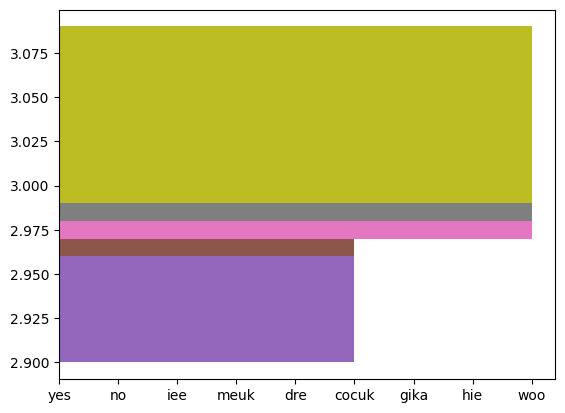

In [16]:
# nums_b = list(df_boven_f["taxonomic_name"][:10])
# df_boven_10 = intersect_org(nums_b, df_boven)
# l_boven_10 = list(df_boven_10["taxonomic_name"])
# perc_boven = list(df_boven_10["perc_frag"])
l_boven_10 = ["yes", "no", "iee", "meuk", "dre", "cocuk", "gika", "hie", "woo", "whops"]

# nums_m = list(df_midden_f["taxonomic_name"][:10])
# df_midden_10 = intersect_org(nums_m, df_midden)
# l_midden_10 = list(df_midden_10["taxonomic_name"])
# perc_midden = list(df_midden_10["perc_frag"])
l_midden_10 = ["yes", "no", "iee", "meuk", "dre", "cocuk", "gika", "hie", "woo", "whops"]

# nums_o = list(df_onder_f["taxonomic_name"][:10])
# df_onder_10 = intersect_org(nums_o, df_onder)
# l_onder_10 = list(df_onder_10["taxonomic_name"])
# perc_onder = list(df_onder_10["perc_frag"])
l_onder_10 = ["yes", "no", "iee", "meuk", "dre", "cocuk", "gika", "hie", "woo", "whops"]



# all top 10s need to disperse these over 3 lists
l10k3 = [[l_boven_10[i:i+3], l_midden_10[i:i+3], l_onder_10[i:i+3]] for i in range(0, len(l_onder_10), 3)]


# Sample data
categories = ["Boven", " Midden", "Onder"]

# Create figure and axis objects
fig, ax = plt.subplots()

# Set the height of the bars
bar_height = 0.1

# Set the positions of the bars on the y-axis
y = [[perc_boven[i:i+3], perc_midden[i:i+3], perc_onder[i:i+3]] for i in range(0, len(l_onder_10), 3)]

# Plot the bars
bar1 = ax.barh(y[0][0] - bar_height/10, l10k3[0][0], bar_height)
bar2 = ax.barh(y[0][1] - bar_height/10*2, l10k3[0][1], bar_height)
bar3 = ax.barh(y[0][2] - bar_height/10*3, l10k3[0][2], bar_height)
bar4 = ax.barh(y[1][0] - bar_height/10*4, l10k3[1][0], bar_height)
bar5 = ax.barh(y[1][1] - bar_height/10*5, l10k3[1][1], bar_height)
bar6 = ax.barh(y[1][2] + bar_height/10, l10k3[1][2], bar_height)
bar7 = ax.barh(y[2][0] + bar_height/10*2, l10k3[2][0], bar_height)
bar8 = ax.barh(y[2][1] + bar_height/10*3, l10k3[2][1], bar_height)
bar9 = ax.barh(y[2][2] + bar_height/10*4, l10k3[2][2], bar_height)
bar10 = ax.barh(y[3] + bar_height/10*5, l10k3[3], bar_height)



# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Categories')
ax.set_title('Multiple Horizontal Bar Plot Example')
ax.set_yticks(y)
ax.set_yticklabels(categories)
ax.legend()

# Show the plot
plt.rcParams["figure.figsize"] = (10,8)


In [ ]:

print(l10k3[3])

[['Homininae'], ['Homininae'], ['Homininae']]
